# Computer vision problem

Un problema de este tipo asignan a un objeto una clase o nombre y permiten reconocer estos.
Para tiempo real buenas herramientas son, por ejemplo, YOLO. Aunque esta ultima no es tema de este laboratorio.

<center><img src="img/computer_vision.png" width="900"></center>

Mayormente las imagenes son tratadas pixel por pixel y una red neuronal se encargará de la identificación de patrones, tomando en cuenta los colores de cada pixel, teniendo como entrada 244x244.

# Redes redes neuronales convolucionales (CNN)

Las redes neuronales convolucionales (CNN) son un tipo de red neuronal diseñada para procesar imágenes y datos con estructura de cuadrícula. Se componen de:

1. *Capas de Convolución:* Extraen características utilizando filtros que detectan patrones (bordes, texturas).
2. *Capas de Pooling:* Reducen la dimensionalidad y mantienen características importantes, ayudando a prevenir el sobreajuste.
3. *Capas Densas:* Conectan todas las neuronas de la capa anterior para clasificar las características en categorías.

<center><img src="img/red_convolucionales.png"></center>

Estos problemas casi nunca (por no decir nunca) se resuelven de manera lineal, por lo que las funciones de activación rara vez serán lineales, aunque esto depende de la arquitectura.

# Torchvision
<center><img src="img/torchvision.png"></center>

In [30]:
# Importamos librerias
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Obteniendo el set de datos

Obtengamos el set de datos con las funciones y métodos de pyTorch

In [31]:
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)


test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [32]:
from torchvision import datasets, transforms

# Definir las transformaciones una sola vez
transform = transforms.Compose([
    transforms.ToTensor(),              # Convierte la imagen a tensor [1, 28, 28]
    transforms.Resize((28, 28))         # (opcional si el dataset no es 28x28)
])

# Dataset de entrenamiento
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform,
    target_transform=None
)

# Dataset de prueba
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transform,
    target_transform=None
)


In [33]:
print(f"Tamaño del set de datos de entrenamiento: {len(train_data)}, tamaño del set de datos de prueba:{len(test_data)}")

print(f"Clases del set de datos: {train_data.classes}")

image, label = train_data[0]
# image, label

print(f"Colores en escala de grises {image.shape[0]} , largo {image.shape[1]}, ancho: {image.shape[2]}")

Tamaño del set de datos de entrenamiento: 60000, tamaño del set de datos de prueba:10000
Clases del set de datos: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Colores en escala de grises 1 , largo 28, ancho: 28


<center><img src="img/dataset_ropa_ejemplo.png"></center>

# Visualizemos nuestro set de datos

Visualizar, visualizar, vi...

torch.Size([1, 28, 28])
Comprimido: torch.Size([28, 28])


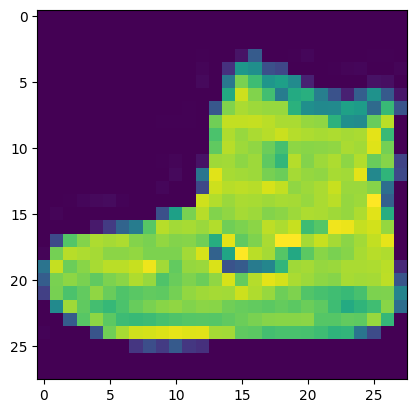

In [34]:
import matplotlib.pyplot as plt

image, label =  train_data[0]
print(f"{image.shape}")
print(f"Comprimido: {image.squeeze().shape}")
plt.imshow(image.squeeze()) # image.squeeze() borra la escala de grises, es decir: el 1 restante, luego lo arreglamos con cmap=gray

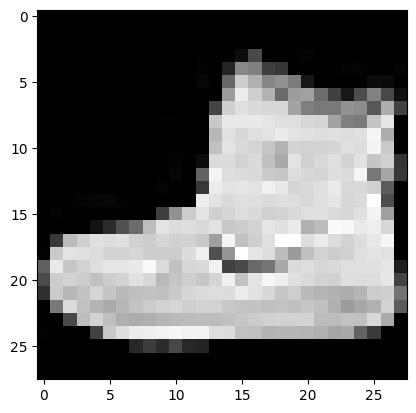

In [35]:
plt.imshow(image.squeeze(), cmap="gray")

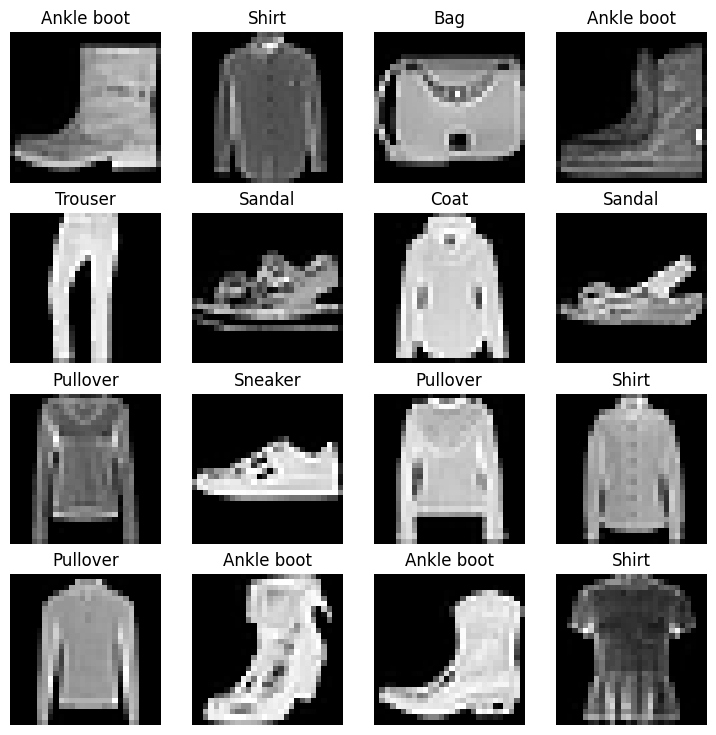

In [36]:
clases = train_data.classes
# Visualizemos todo tipo de datos que tengamos en nuestro set de datos de forma aleatoria...

torch.manual_seed(42) # Según la semilla asignada traerá otros elementos del set de datos 

fig = plt.figure(figsize=(9, 9))
fila, col = 4, 4
for i in range(1, fila * col + 1):
    imagen_random = torch.randint(0, len(train_data), size=[1]).item() # Indice de la posición en el tensor
    img, label = train_data[imagen_random] # Ahora la traeremos, así como si fuera un vector 
    fig.add_subplot(fila, col, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(clases[label]) 
    plt.axis(False)


# Preparar dataloader

Los datos actualmente estan cargados en set de datos de pyTorch, el **DataLoader** transforma estos en iterables, diviendo estos en mini conjuntos o conjuntos más pequeños dado su beneficio en su coste computacional.

La documentación asociada es la siguiente: https://docs.pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [37]:
from torch.utils.data import DataLoader

# Configuramos los hiperparametros

BATCH_SIZE = 32

train_data_loader = DataLoader(dataset=train_data,
                               batch_size=BATCH_SIZE,
                               shuffle=True)

test_data_loader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)


train_data_loader, test_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x17224b1ec10>,
 <torch.utils.data.dataloader.DataLoader at 0x172202d3bb0>)

In [38]:
print(f"DataLoaders: {train_data_loader, test_data_loader}")
print(f"Longitud del train_data_loader: {len(train_data_loader)} con lotes de {BATCH_SIZE}")
print(f"Longitud del test_data_loader: {len(test_data_loader)} con lotes de {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000017224B1EC10>, <torch.utils.data.dataloader.DataLoader object at 0x00000172202D3BB0>)
Longitud del train_data_loader: 1875 con lotes de 32
Longitud del test_data_loader: 313 con lotes de 32


In [39]:
train_features_batch, train_labels_batch = next(iter(train_data_loader))

Tamaño: torch.Size([1, 28, 28])
Etiqueta: 6


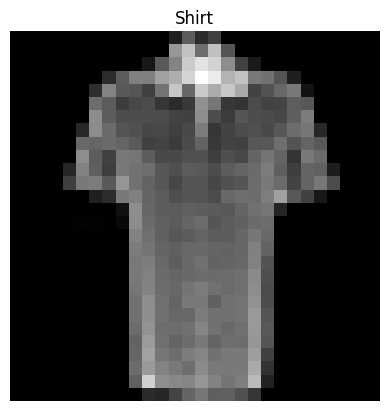

In [40]:
torch.manual_seed(42) # Cambiando la semilla podrémos cambiar a otro producto y comprobar si anda bien o hace cualquier cosa

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item() # Indice
img, label = train_features_batch[random_idx], train_labels_batch[random_idx] 
plt.imshow(img.squeeze(), cmap="grey")
plt.title(clases[label])
plt.axis(False)
print(f"Tamaño: {img.shape}")
print(f"Etiqueta: {label}")

# Baseline model

Un *baseline model* (modelo base o modelo de referencia) en machine learning es un modelo simple y rápido de construir que se utiliza como punto de comparación inicial para evaluar el rendimiento de modelos más complejos.

Para esto debemos crear un capa *flatten*: convierte a 1D los tensores y datos. (Pesima explicación, la verdad tampoco entendí muy bien)

In [41]:
flatten_model = nn.Flatten()

x = train_features_batch[0]
print(f"Antes de flatten: {x.shape}")

output = flatten_model(x) 
print(f"Después del flatten: {output.shape}")

# Si a esto le aplicamos squeeze() obtendrémos un gran vector con los valores correspondientes, aunque será de tipo torch.Tensor
output.squeeze()
type(output)

Antes de flatten: torch.Size([1, 28, 28])
Después del flatten: torch.Size([1, 784])


torch.Tensor

In [42]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [43]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(clases)
)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [44]:
dummmy_x = torch.rand([1, 1, 28, 28]) # Prueba para el modelo con arquitectura de tamaño aleatorio
model_0(dummmy_x) # .shape

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

# Configuración de función de perdida, exactitud y evaluación de metricas

Nos valdrémos de helper_functions.py

In [45]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("Ya existe, no hace falta descargarlo")
else: 
    print("Descargando... ... ...")
    requerimiento = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(requerimiento.content)

Ya existe, no hace falta descargarlo


In [46]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

# Función de tiempo 

Crearé una función que medirá el tiempo que tarda en entrenarse la red usando el CPU vs mi GPU.

CPU: AMD Ryzen 5 2600 Six-Core Procesessor 3.40 GHz
GPU: Radeon RX 570 Sries 4GB
RAM: 16 GB

In [47]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Tiempo total: {total_time:.3f} segundos")
    return total_time

start_time = timer()
end_time = timer()

# Ciclo de entrenamiento para los bloques o batches de data

1. Iterar a través de las épocas.
2. Iterar a través de los bloques de entrenamiento.
3. Iterar a través de los bloques de prueba.
4. Imprimir que occure.
5. Utilizar la función de tiempo

In [48]:
# Acá cambie bastante el código, no me andaba del todo bien inicialmente...
from tqdm.auto import tqdm

# Timer
torch.manual_seed(42)
tiempo_inicial_modelo_0 = timer()

# Epocas
epocas = 3

# Ciclo de entrenamiento

num_prints = 5  # cantidad de veces que querés mostrar "Lotes: ..."
samples_total = len(train_data_loader.dataset)
print_interval = samples_total // num_prints

for epoca in tqdm(range(epocas)):
    print(f"\nÉpoca: {epoca}")

    train_loss = 0
    model_0.train()

    for batch, (X, y) in enumerate(train_data_loader):
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calcular pérdida
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Mostrar avance cada print_interval muestras
        current_sample = batch * len(X)
        if current_sample % print_interval < len(X):
            print(f"Lotes: {current_sample}/{samples_total} samples")

    train_loss /= len(train_data_loader)

    # Ciclo de prueba
    test_loss = 0
    test_acc = 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_data_loader:
            test_pred = model_0(X_test)
            test_loss += loss_fn(test_pred, y_test).item()
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_data_loader)
    test_acc /= len(test_data_loader)

    # Mostrar métricas de la época
    print(f"Perdida de entrenamiento: {train_loss:.5f}, pérdida en prueba: {test_loss:.5f}, exactitud de prueba: {test_acc:.5f}")

tiempo_final_modelo_0 = timer()
tiempo_total_modelo_0 = print_train_time(start=tiempo_inicial_modelo_0, end=tiempo_final_modelo_0)


  0%|          | 0/3 [00:00<?, ?it/s]


Época: 0
Lotes: 0/60000 samples
Lotes: 12000/60000 samples
Lotes: 24000/60000 samples
Lotes: 36000/60000 samples
Lotes: 48000/60000 samples


 33%|███▎      | 1/3 [00:12<00:24, 12.32s/it]

Perdida de entrenamiento: 0.59039, pérdida en prueba: 0.50954, exactitud de prueba: 82.03874

Época: 1
Lotes: 0/60000 samples
Lotes: 12000/60000 samples
Lotes: 24000/60000 samples
Lotes: 36000/60000 samples
Lotes: 48000/60000 samples


 67%|██████▋   | 2/3 [00:23<00:11, 11.91s/it]

Perdida de entrenamiento: 0.47633, pérdida en prueba: 0.47989, exactitud de prueba: 83.19688

Época: 2
Lotes: 0/60000 samples
Lotes: 12000/60000 samples
Lotes: 24000/60000 samples
Lotes: 36000/60000 samples
Lotes: 48000/60000 samples


100%|██████████| 3/3 [00:35<00:00, 11.83s/it]

Perdida de entrenamiento: 0.45503, pérdida en prueba: 0.47664, exactitud de prueba: 83.42652
Tiempo total: 35.480 segundos


# Realizar predicciones

Para evaluar el modelo crearemos una función ***eval_model***.

In [49]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Realizar predicciones:
            y_pred = model(X)
            # Perdida y ganancia acumulada por lote
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
            
        # Perdida y ganancia promedio

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

model_0_results = eval_model(model_0, test_data_loader, loss_fn, accuracy_fn) # No hace falta poner atributo=valor, con poner los valores alcanza

100%|██████████| 313/313 [00:01<00:00, 220.26it/s]


# Nuevo modelo no lineal

Dado que el problema cuenta con imagenes que rara vez contiene patrones lineales, tal como se explico previamente, podémos decir que probar con un modelo no lineal probablemente sea la mejor solución, así juguemos con su arquitectura.

In [50]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x:torch.Tensor):
        return self.layer_stack(x)  

In [51]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(clases))

# model_1

In [52]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.1)

# Ciclo de entrenamiento y prueba a una función

El hecho de realizar hasta ahora manualmente el ciclo de entrenamiento y prueba se da dado que es útil programar a mano la mayor cantidad de código posible para así aprender bien la tecnologia. Si bien el curso tiene una duración considerable, no esta demás seguir haciendolo manualmente hasta que salga con los ojos cerrados, sin embargo para optimizar tiempo el curso contempla que acá que exista una función que facilite la creación de estos. 

In [53]:
# Ciclo de entrenamiento

def ciclo_de_entrenamiento(model: torch.nn.Module,
                           data_loader: torch.utils.data.DataLoader,
                           loss_fn: torch.nn.Module,
                           optimizer: torch.optim.Optimizer,
                           accuracy_fn):
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader): # enumerate = ENUM de Java
        # 1. Forward pass
        y_pred = model(X)

        # 2. Perdida
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Retropropagación
        loss.backward()
        # 5. Optimizer step
        optimizer.step()

    # Perdida y exactitud 
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Pedida en entrenamiento: {train_loss:.5f}, exactitud en entrenamiento: {train_acc:.2f}")

# Ciclo de prueba

def ciclo_de_prueba(model: torch.nn.Module, 
                    data_loader: torch.utils.data.DataLoader,
                    loss_fn: torch.nn.Module,
                    accuracy_fn):
    
    test_loss, test_acc = 0, 0

    model.eval()
    
    with torch.inference_mode():
        for X, y in data_loader:
            test_pred = model(X)

            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Perdida en prueba: {test_loss:.5f}, exactitud en prueba: {test_acc:.2f}")

# Probemos nuestro modelo con las funciones

In [54]:
torch.manual_seed(42)

from timeit import default_timer as timer
t_comienzo_entrenamiento_gpu = timer()

epocas = 3

for epoca in tqdm(range(epocas)):
    print(f"Epoca: {epoca} \n")
    ciclo_de_entrenamiento(model = model_1,
                           data_loader = train_data_loader,
                           loss_fn = loss_fn,
                           optimizer = optimizer,
                           accuracy_fn = accuracy_fn) 
    
    ciclo_de_prueba(model = model_1, 
                    data_loader = test_data_loader,
                    loss_fn = loss_fn,
                    accuracy_fn = accuracy_fn)

t_finalizacion_entrenamiento_gpu = timer()
tiempo_total_modelo_1 = print_train_time(start=t_comienzo_entrenamiento_gpu,
                                                       end=t_finalizacion_entrenamiento_gpu)

model_1_results = eval_model(model=model_1,
                          data_loader=test_data_loader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoca: 0 

Pedida en entrenamiento: 1.09199, exactitud en entrenamiento: 61.34


 33%|███▎      | 1/3 [00:12<00:24, 12.29s/it]

Perdida en prueba: 0.95637, exactitud en prueba: 65.00
Epoca: 1 

Pedida en entrenamiento: 0.78101, exactitud en entrenamiento: 71.93


 67%|██████▋   | 2/3 [00:25<00:12, 12.91s/it]

Perdida en prueba: 0.72227, exactitud en prueba: 73.91
Epoca: 2 

Pedida en entrenamiento: 0.67027, exactitud en entrenamiento: 75.94


100%|██████████| 3/3 [00:37<00:00, 12.61s/it]


Perdida en prueba: 0.68500, exactitud en prueba: 75.02
Tiempo total: 37.828 segundos


100%|██████████| 313/313 [00:01<00:00, 216.01it/s]


In [55]:
print(f"tiempo de entrenamiento modelo 0:{tiempo_total_modelo_1}") # Nombre re mal las variables, el mal nombre fue evolucionando a medida que entendia que pasaba pero las deje así para no romper nada

tiempo de entrenamiento modelo 0:37.827555599971674


# Conclusión (?)
Tal como podemos ver, así hayamos utilizado funciones de activación no lineales el modelo es incluso peor, la arquitectura es clave para la eficiencia de nuestro modelo.

<center><img src="img/cnn_basico.png"></center>

Un buen recurso que explica como funcionan estos es el siguiente: https://poloclub.github.io/cnn-explainer/.

Con más supusiciones que entendimiento se podría decir que las redes neuronales son a fin de cuentas prueba y error, pero dado el coste computacional, de tiempo y economico que la prueba y error tienen se establecen ciertos estandares de arquitectura con ciertas modificaciones que se adaptan a los requerimientos.

Arquitecturas populares son: https://www.geeksforgeeks.org/machine-learning/convolutional-neural-network-cnn-architectures/#:~:text=The%20First%20LeNet%2D5%20architecture,5%20architecture%20has%2060%2C000%20parameters.


# CNN: Convultional Neuronal Networks

In [56]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int): 
        super().__init__()
        self.conv_block_1 = nn.Sequential( # Podemos decir que una red tiene muchas redes adentro, es por esto que si nuestro arquitectura es más grande podémos dividir en bloques la misma
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),# Hiperparametros, profundizar en el poloclub. 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # MaxPool2d, ver documentación
            ) 
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(), # Tendremos como input altura*ancho para tener asi todos los pixeles disponibles
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        
        return x

In [57]:
torch.manual_seed(42)

# Crearemos un lote de imagenes

imagenes = torch.randn(size=(32, 3, 64, 64))
test_imagenes = imagenes[0]

print(f"Dimensión del lote: {imagenes.shape}")
print(f"Dimensión de las imagenes del lote: {test_imagenes.shape}")
print(f"Imagen de prueba: {test_imagenes}")

Dimensión del lote: torch.Size([32, 3, 64, 64])
Dimensión de las imagenes del lote: torch.Size([3, 64, 64])
Imagen de prueba: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1

In [58]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(clases))

model_2.state_dict

<bound method Module.state_dict of FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)>

In [59]:
# plt.imshow(test_imagenes.squeeze(), cmap="gray")

# Conv2d

El funcionamiento de la capa Conv2d es el siguiente:

<center><img src="img/conv2_layer.gif"></center>

El fundamento matemático esta en el sitio oficial de pyTorch, al no ser maquinas y no tener en parte la necesidad ni capacidad de acceder en tiempo real a cada una de las operaciones matemáticas con entenderla alcanza, y para esto es más eficiente valernos del ejemplo gráfico anteriormente dado.

In [60]:
torch.manual_seed(42)

conv2d_layer = nn.Conv2d(in_channels=3,
                         out_channels=10,
                         kernel_size=3,
                         stride=1,
                         padding=0)

conv2d_layer(test_imagenes)

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [61]:
test_imagenes.shape, test_imagenes.unsqueeze(dim=0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

# MaxPool2d

La documentación asociada se encuentra aqui: https://docs.pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html
Un ejemplo gráfico de como funciona esta tipo de funciones de activación es la siguiente:
<center><img src="img/max_pool.png"></center>

In [62]:
# Tamaño original de las imagenes de prueba

print(f"Dimensión de la imagen original: {test_imagenes.shape}")
print(f"Dimensión de la imagen descomprimida: {test_imagenes.unsqueeze(0).shape}")

# Capa nn.MaxPool2d
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pasa por la capa conv2D
test_imagenes_en_conv2D = conv2d_layer(test_imagenes.unsqueeze(dim=0))
print(f"Después de pasarlo por la capa conv2d: {test_imagenes_en_conv2D.shape}")

# Pasa por la capa maxPool2D

test_imagenes_en_maxPool2D = max_pool_layer(test_imagenes_en_conv2D)
print(f"Después de pasarlo por la capa conv2d y luego maxPool2D: {test_imagenes_en_maxPool2D.shape}")

Dimensión de la imagen original: torch.Size([3, 64, 64])
Dimensión de la imagen descomprimida: torch.Size([1, 3, 64, 64])
Después de pasarlo por la capa conv2d: torch.Size([1, 10, 62, 62])
Después de pasarlo por la capa conv2d y luego maxPool2D: torch.Size([1, 10, 31, 31])


In [63]:
torch.manual_seed(42)

random_tensor = torch.randn(size=(1, 1, 2, 2))

max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMaxPool2d tensor: {max_pool_tensor}")
print(f"Dimensión del MaxPool2d tensor: {max_pool_tensor.shape}")


MaxPool2d tensor: tensor([[[[0.3367]]]])
Dimensión del MaxPool2d tensor: torch.Size([1, 1, 1, 1])


Hasta ahora nuestra red tiene el siguiente formato:
<center><img src="img/red_CNN_P1.png"></center>

# Modelo 2 con CNN

1. Instanciaremos las funciones de perdida y optimización
2. Crearemos las funciones correspondientes

In [64]:
# Perdida y optimización
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [65]:
torch.manual_seed(42)

from timeit import default_timer as timer
inicio_modelo_2 = timer()
epocas = 3
for epoca in tqdm(range(epocas)):
    print(f"Epoca: {epoca}\n")
    ciclo_de_entrenamiento(model=model_2,
                           data_loader=train_data_loader,
                           loss_fn=loss_fn,
                           optimizer=optimizer,
                           accuracy_fn=accuracy_fn) 
    ciclo_de_prueba(model=model_2,
                    data_loader=test_data_loader,
                    loss_fn=loss_fn,
                    accuracy_fn=accuracy_fn)

finalizacion_modelo_2 = timer()
tiempo_total_modelo_2 = print_train_time(start=inicio_modelo_2, end=finalizacion_modelo_2)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoca: 0

Pedida en entrenamiento: 0.58819, exactitud en entrenamiento: 78.67


 33%|███▎      | 1/3 [00:35<01:11, 35.71s/it]

Perdida en prueba: 0.40317, exactitud en prueba: 85.76
Epoca: 1

Pedida en entrenamiento: 0.36085, exactitud en entrenamiento: 86.94


 67%|██████▋   | 2/3 [01:09<00:34, 34.59s/it]

Perdida en prueba: 0.34778, exactitud en prueba: 87.11
Epoca: 2

Pedida en entrenamiento: 0.32424, exactitud en entrenamiento: 88.19


100%|██████████| 3/3 [01:45<00:00, 35.14s/it]

Perdida en prueba: 0.31492, exactitud en prueba: 88.69
Tiempo total: 105.415 segundos


In [66]:
model_2_results = eval_model(model=model_2,
                             data_loader=test_data_loader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_2_results



100%|██████████| 313/313 [00:02<00:00, 123.67it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31491801142692566,
 'model_acc': 88.68809904153355}

In [67]:
# Comparación de resultados del modelo junto a sus tiempos de entrenamiento correspondientes

import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results]) # Ponerlo como una lista, sino no anda

compare_results.rename(columns={
    "model_name": "Modelo",
    "model_loss": "Pérdida",
    "model_acc": "Exactitud",
    "tiempo_de_entrenamiento": "Tiempo de Entrenamiento (s)"
}, inplace=True)


print(compare_results)

                Modelo   Pérdida  Exactitud
0  FashionMNISTModelV0  0.476639  83.426518
1  FashionMNISTModelV1  0.685001  75.019968
2  FashionMNISTModelV2  0.314918  88.688099


In [68]:
# Comparación entre tiempos de entrenamiento, anidamos una columna

compare_results["tiempo_de_entrenamiento"] = pd.DataFrame([tiempo_total_modelo_0,
                             tiempo_total_modelo_1,
                             tiempo_total_modelo_2])

compare_results # Luego cambiaré los nombres de los campos


,Modelo,Pérdida,Exactitud,tiempo_de_entrenamiento
0,FashionMNISTModelV0,0.476639,83.426518,35.479699
1,FashionMNISTModelV1,0.685001,75.019968,37.827556
2,FashionMNISTModelV2,0.314918,88.688099,105.414966


Text(0, 0.5, 'Modelo')

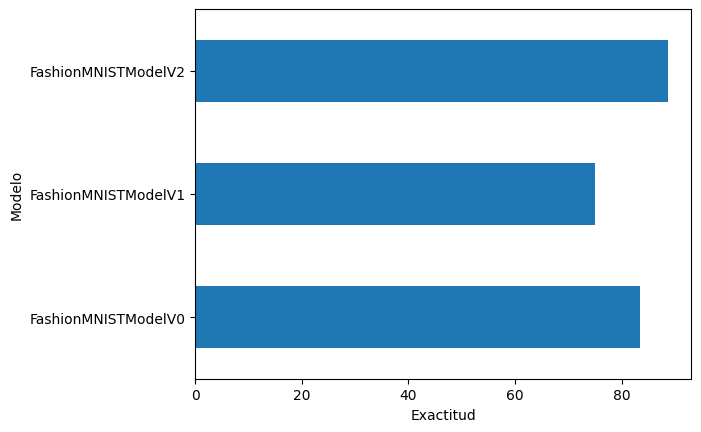

In [69]:
compare_results.set_index("Modelo")["Exactitud"].plot(kind="barh")
plt.xlabel("Exactitud")
plt.ylabel("Modelo")

# Predicciones

Ya realizamos 3 modelos, pudimos ver como el V2, mezclando funciones de activación lineales y no lineales con una estructura más robusta es el más efectivo.

Estamos en condiciones de utilizar estos con nuestro set de datos de ropa.

In [70]:
def realizar_predicciones(model: torch.nn.Module, 
                          data: list):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0)
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            pred_probs.append(pred_prob)
            
    
    return torch.stack(pred_probs)

In [71]:
import random
random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

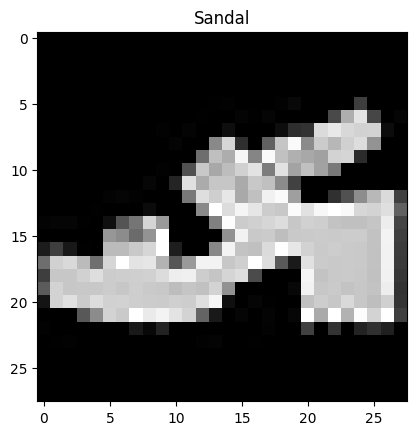

In [72]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(clases[test_labels[0]])

In [73]:
# Ahora si, realizaremos predicciones a gusto

pred_probs = realizar_predicciones(model=model_2,
                                   data=test_samples)

# pred_probs

# test_labels

In [74]:
predd_clases = pred_probs.argmax(dim=1)
predd_clases

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

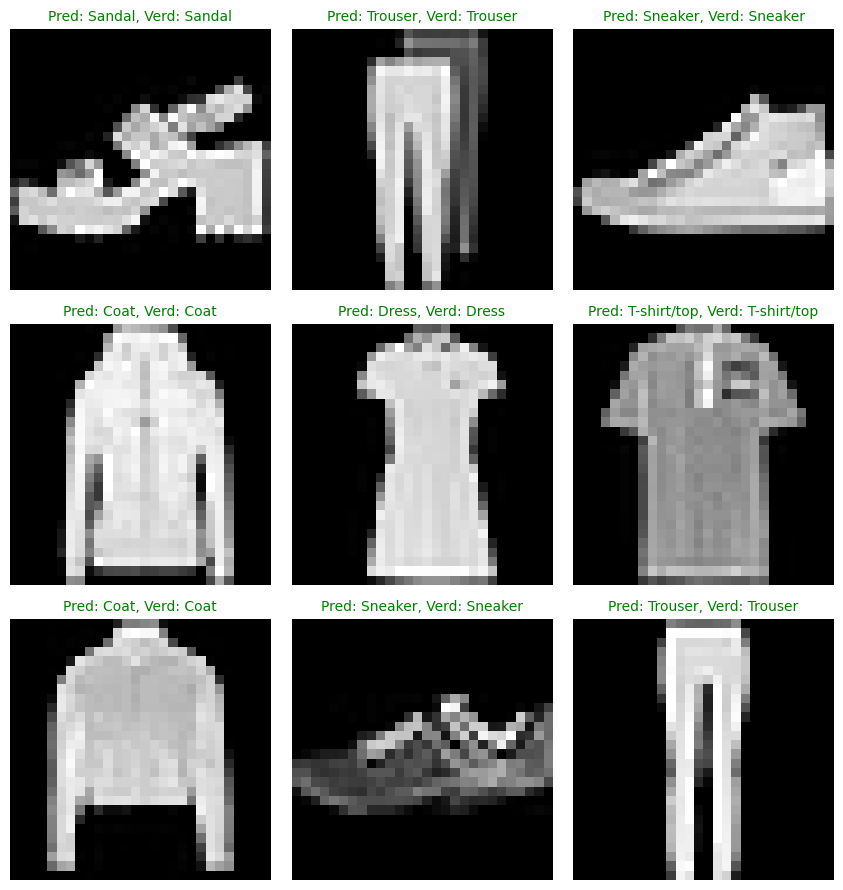

In [75]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
    # Crear sub graficos correspondientes
    plt.subplot(nrows, ncols, i+1)
    plt.subplots_adjust(hspace=0.6, wspace=0.2)
    plt.axis(False)

    # Graficar esto:
    plt.imshow(sample.squeeze(), cmap="gray")

    # Encontrar la predicción...

    pred_label = clases[predd_clases[i]]
    
    label_correcto = clases[test_labels[i]]

    titulo = f"Pred: {pred_label}, Verd: {label_correcto}"

    if pred_label == label_correcto:
        plt.title(titulo, fontsize=10, c="g")
    else:
        plt.title(titulo, fontsize=10, c="r")
 
plt.tight_layout()

Pobrémos sin random.seed()

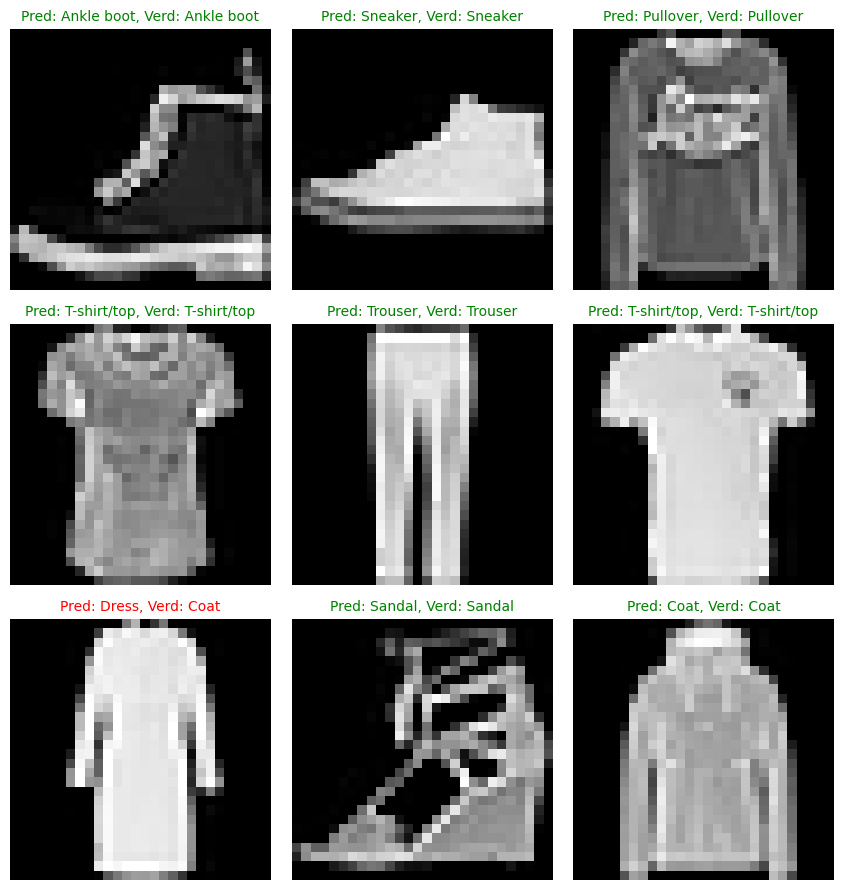

In [76]:
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape

pred_probs = realizar_predicciones(model=model_2,
                                   data=test_samples)

predd_clases = pred_probs.argmax(dim=1)

plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
    # Crear sub graficos correspondientes
    plt.subplot(nrows, ncols, i+1)
    plt.subplots_adjust(hspace=0.6, wspace=0.2)
    plt.axis(False)

    # Graficar esto:
    plt.imshow(sample.squeeze(), cmap="gray")

    # Encontrar la predicción...

    pred_label = clases[predd_clases[i]]
    
    label_correcto = clases[test_labels[i]]

    titulo = f"Pred: {pred_label}, Verd: {label_correcto}"

    if pred_label == label_correcto:
        plt.title(titulo, fontsize=10, c="g")
    else:
        plt.title(titulo, fontsize=10, c="r")
 
plt.tight_layout()

# Matriz de confusión

La matriz de confusión es una manera muy buena de clasificar nuestros modelos de clasificación de manera visual: https://lightning.ai/docs/torchmetrics/stable/classification/confusion_matrix.html.
Los pasos a realizar serán:
1. Realizar predicciones con nuestro modelo entrenado.
2. Realizar la matriz de confusión.
3. Gráficar la matriz de confusión e interpretarla. 

In [ ]:
# 1.
from tqdm.auto import tqdm

y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_data_loader, desc="Realizado predicciones..."): # El desc es un print sin salto de linea muy bueno
        # Forward pass
        y_logit = model_2(X)
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        y_preds.append(y_pred) 
        
y_pred_tensor = torch.cat(y_preds) # Concatena las predicciones en un tensor
y_pred_tensor[:10]
# len(y_pred_tensor)

Realizado predicciones...: 100%|██████████| 313/313 [00:02<00:00, 105.84it/s]


tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [87]:
# 2.
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(clases), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

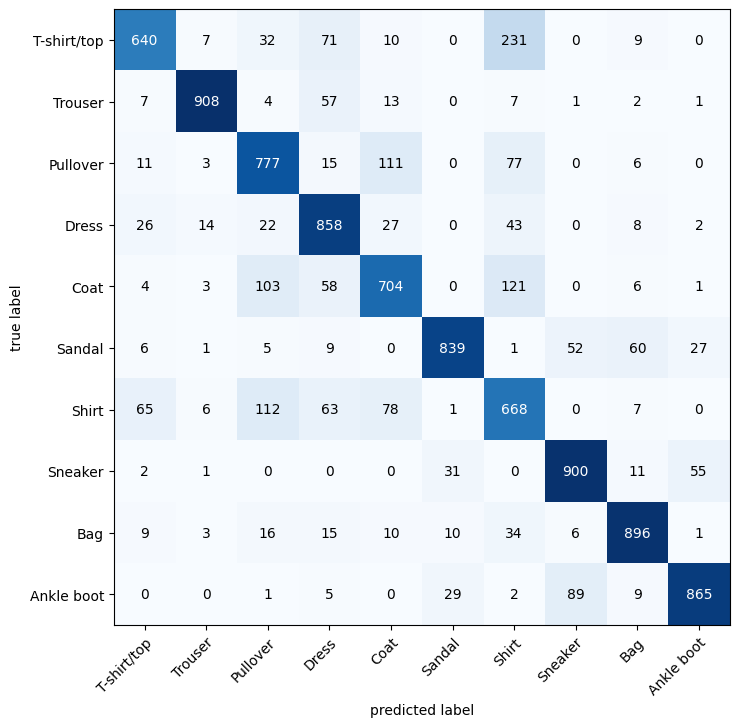

In [89]:
# 3.
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=clases,
    figsize=(10, 8)
)

# Guardamos nuestro modelo

In [ ]:
from pathlib import Path

# Ruta del modelo
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Guardamos el modelo

MODEL_NAME = "modelo_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_2.state_dict())

WindowsPath('models/modelo_2.pth')

# Cargamos nuestro modelo

In [ ]:
loaded_model_2 = FashionMNISTModelV2(input_shape=1, 
                                    hidden_units=10, 
                                    output_shape=10) 

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

NameError: name 'FashionMNISTModelV2' is not defined